In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [2]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [3]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.1
N = 600

600

In [4]:
xint= [-50, 50]
dx = 10
yint = [-50, 50]
dy = 10
zint = [-30, 70]
dz = 10

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);
num = length(initial_points)

1331

In [15]:
Ma = []
l = length(initial_points)
for x₀ = initial_points
    sol = zeros(3,N+1)
    sol[:,1] = x₀
    for i = 1:N
        t = Δt*i
        prob = ODEProblem(LorentzSystem,x₀,(0,t),p);
        X1 = solve(prob, RadauIIA5(), adaptive=true, abstol=1e-2, reltol=1e-2);
        sol[:,i+1] = X1.u[end]
    end
    push!(Ma, sol)
end

In [16]:
FileIO.save(raw"Variables\RadauIIA5adaptive\1e-2.jld2", "M", Ma)

In [17]:
Mtrue = FileIO.load(raw"Variables\Radau1E-5.jld2","M");

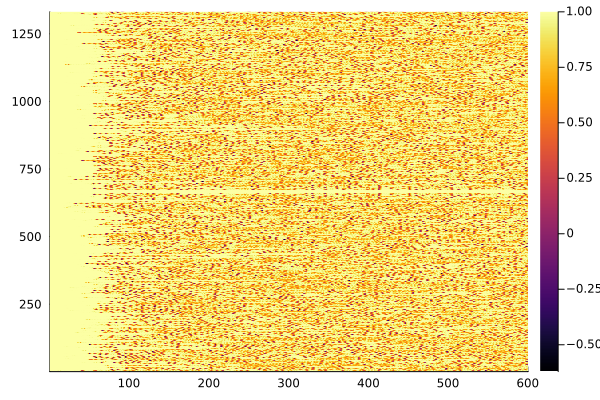

In [18]:
M = CorrelationMatrix(Ma, Mtrue, l, N)
heatmap(M)